In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
#from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from joblib import load
#from sklearn.ensemble import GradientBoostingRegressor
#from sklearn.linear_model import BayesianRidge
#from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("/kaggle/input/used-cars-for-sale-in-egypt/hatla2ee_scraped_data.csv")

In [3]:
df.head()

,Name,Price,Color,Mileage,Make,Model,City,Date Displayed,Automatic Transmission,Air Conditioner,Power Steering,Remote Control,Item URL
0,Kia Sportage 2024,"2,800,000 EGP",Dark grey,300 Km,Kia,Sportage,Tagamo3 - New Cairo,2024-02-16,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/kia/sportage/62...
1,Chery Arrizo 5 2022,NaN,Bronze,"86,000 Km",Chery,Arrizo 5,Nasr city,2024-02-16,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/chery/Arrizo-5/...
2,Fiat Tipo 2021,"1,200,000 EGP",Petroleum,"131,000 Km",Fiat,Tipo,Kafr el-Dawwar,2024-02-16,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/fiat/tipo/6286701
3,Hyundai Tucson Turbo GDI 2021,"2,050,000 EGP",Black,"125,000 Km",Hyundai,Tucson Turbo GDI,Nasr city,2024-02-16,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/hyundai/Tucson-...
4,BMW X1 2018,"2,050,000 EGP",Gray,"84,000 Km",BMW,X1,Cairo,2024-02-16,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/bmw/x1/6254123


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33559 entries, 0 to 33558
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Name                    33559 non-null  object
 1   Price                   32625 non-null  object
 2   Color                   33559 non-null  object
 3   Mileage                 31440 non-null  object
 4   Make                    33559 non-null  object
 5   Model                   33559 non-null  object
 6   City                    33559 non-null  object
 7   Date Displayed          33559 non-null  object
 8   Automatic Transmission  33559 non-null  object
 9   Air Conditioner         33559 non-null  object
 10  Power Steering          33559 non-null  object
 11  Remote Control          33559 non-null  object
 12  Item URL                33559 non-null  object
dtypes: object(13)
memory usage: 3.3+ MB


In [5]:
df.isna().sum()

Name                         0
Price                      934
Color                        0
Mileage                   2119
Make                         0
Model                        0
City                         0
Date Displayed               0
Automatic Transmission       0
Air Conditioner              0
Power Steering               0
Remote Control               0
Item URL                     0
dtype: int64

In [6]:
df.shape

(33559, 13)

In [7]:
df.dropna(inplace=True)

In [8]:
df.shape

(31095, 13)

# EDA

In [9]:
df["Name"].value_counts()

Name
Nissan Sunny 2022           644
Fiat Tipo 2021              416
Nissan Sunny 2020           393
MG 5 2022                   344
Renault Megane 2020         343
                           ... 
Haval H6 2024                 1
Toyota Camry 1994             1
Chery Tiggo 2023              1
Hyundai Elantra CN7 2024      1
Volkswagen Golf 2 1984        1
Name: count, Length: 3889, dtype: int64

In [10]:
df["Model"].value_counts()

Model
Sunny          1847
Corolla        1494
Verna          1066
Optra           952
Tipo            890
               ... 
CLA AMG           1
M70               1
CL Class          1
Fox               1
Duster Nova       1
Name: count, Length: 851, dtype: int64

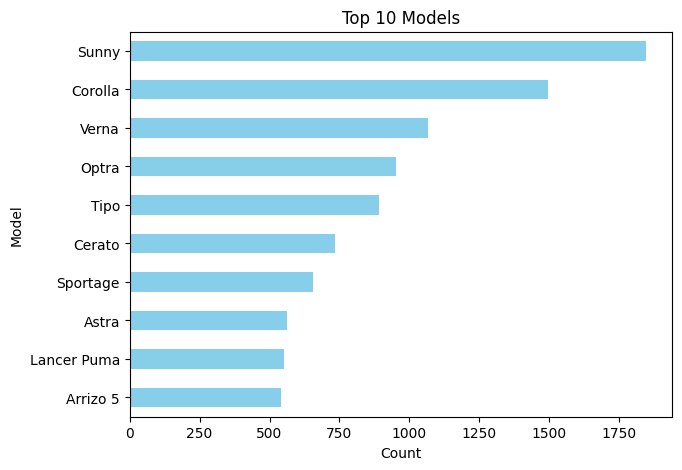

In [11]:
plt.figure(figsize=(7, 5))
df.groupby('Model').size().nlargest(10).sort_values().plot.barh(color='skyblue')
plt.title("Top 10 Models")
plt.xlabel("Count")
plt.ylabel("Model")
plt.show()


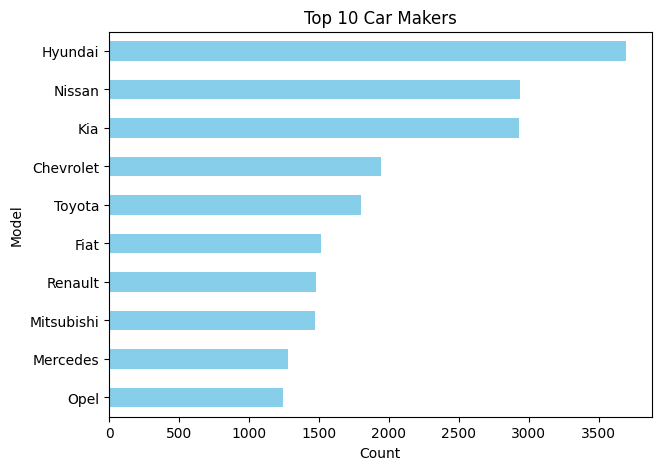

In [12]:
plt.figure(figsize=(7, 5))
df.groupby('Make').size().nlargest(10).sort_values().plot.barh(color='skyblue')
plt.title("Top 10 Car Makers")
plt.xlabel("Count")
plt.ylabel("Model")
plt.show()


In [13]:
columns_to_transform = ['Color', 'Make', 'Model']

for col in columns_to_transform:
    unique_values = df[col].unique()
    print(f"Unique values in '{col}': {unique_values}")


Unique values in 'Color': ['Dark grey' 'Petroleum' 'Black' 'Gray' 'Blue' 'Silver' 'Brown' 'Red'
 'White' 'Dark blue' 'Mocha' 'Bronze' 'Gold' 'Green' 'Dark red' 'Eggplant'
 'Cyan' 'Champagne' 'Yellow' 'Dark green' 'Purple' 'Olive' 'Orange'
 'Beige']
Unique values in 'Make': ['Kia' 'Fiat' 'Hyundai' 'BMW' 'Chevrolet' 'Chery' 'Ford' 'Nissan'
 'Mitsubishi' 'Opel' 'Toyota' 'Jac' 'MG' 'Skoda' 'Daewoo' 'Changan'
 'Mercedes' 'Jeep' 'Daihatsu' 'Lada' 'Citroën' 'Byd' 'Renault' 'Seat'
 'Zotye' 'Suzuki' 'Volkswagen' 'Speranza' 'Senova' 'Brilliance' 'Peugeot'
 'Isuzu' 'Geely' 'Saipa' 'Canghe' 'Audi' 'Jetour' 'Mazda' 'Proton' 'Honda'
 'Emgrand' 'Volvo' 'Lifan' 'DFSK' 'Haval' 'Ssang Yong' 'Porsche' 'Mini'
 'Faw' 'Subaru' 'Forthing' 'Maserati' 'Baic' 'Dodge' 'Ds' 'Haima'
 'Land Rover' 'Chrysler' 'Cupra' 'Kenbo' 'Aston Martin' 'Jaguar' 'Kaiyi'
 'Mahindra' 'Dongfeng' 'Alfa Romeo' 'Lincoln' 'Bentley' 'Bestune' 'Gmc'
 'Acura' 'Hawtai' 'Foton' 'Tesla' 'Tata' 'Karry' 'Chana' 'Soueast'
 'Infiniti' 'Gaz' 'Humm

In [14]:
companies_count = df['Make'].value_counts().nlargest(15)

colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3',
          '#FF6692', '#B6E880', '#FF97FF', '#FECB52', '#1F77B4', '#FF7F0E',
          '#2CA02C', '#D62728', '#9467BD']

fig = go.Figure(data=[go.Pie(labels=companies_count.index,
                             values=companies_count.values,
                             pull=[0.1] + [0] * (len(companies_count) - 1),  
                             marker=dict(colors=colors),  
                             hoverinfo='label+percent+value',  
                             textinfo='label+percent', 
                             textfont=dict(size=14)) 
                    ])

fig.update_layout(
    title_text="Top 15 Car Makers", 
    title_x=0.5,  
    title_font=dict(size=24, color='black', family='Arial'),
    showlegend=True, 
    legend=dict(orientation="h", yanchor="bottom", y=-0.4, xanchor="center", x=0.6, font=dict(size=12)),
    margin=dict(t=100, b=120, l=40, r=40),
    height=800, 
    width=800  
)

fig.show()

In [15]:
companies_count = df['Model'].value_counts().nlargest(15)

colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3',
          '#FF6692', '#B6E880', '#FF97FF', '#FECB52', '#1F77B4', '#FF7F0E',
          '#2CA02C', '#D62728', '#9467BD']

fig = go.Figure(data=[go.Pie(labels=companies_count.index,
                             values=companies_count.values,
                             pull=[0.1] + [0] * (len(companies_count) - 1),  
                             marker=dict(colors=colors),  
                             hoverinfo='label+percent+value',  
                             textinfo='label+percent', 
                             textfont=dict(size=14)) 
                    ])

fig.update_layout(
    title_text="Top 15 Car Models", 
    title_x=0.5,  
    title_font=dict(size=24, color='black', family='Arial'),
    showlegend=True, 
    legend=dict(orientation="h", yanchor="bottom", y=-0.4, xanchor="center", x=0.6, font=dict(size=12)),
    margin=dict(t=100, b=120, l=40, r=40),
    height=800, 
    width=800  
)

fig.show()

# Data Cleaning and Preprocessing

In [16]:
df.head()

,Name,Price,Color,Mileage,Make,Model,City,Date Displayed,Automatic Transmission,Air Conditioner,Power Steering,Remote Control,Item URL
0,Kia Sportage 2024,"2,800,000 EGP",Dark grey,300 Km,Kia,Sportage,Tagamo3 - New Cairo,2024-02-16,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/kia/sportage/62...
2,Fiat Tipo 2021,"1,200,000 EGP",Petroleum,"131,000 Km",Fiat,Tipo,Kafr el-Dawwar,2024-02-16,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/fiat/tipo/6286701
3,Hyundai Tucson Turbo GDI 2021,"2,050,000 EGP",Black,"125,000 Km",Hyundai,Tucson Turbo GDI,Nasr city,2024-02-16,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/hyundai/Tucson-...
4,BMW X1 2018,"2,050,000 EGP",Gray,"84,000 Km",BMW,X1,Cairo,2024-02-16,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/bmw/x1/6254123
5,Chevrolet Optra 2021,"700,000 EGP",Blue,"75,000 Km",Chevrolet,Optra,Obour City,2024-02-16,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/chevrolet/optra...


In [17]:
df["year"] = df["Name"].str.extract(r'(\d{4})')
df["year"] = df["year"].astype(int)

df

,Name,Price,Color,Mileage,Make,Model,City,Date Displayed,Automatic Transmission,Air Conditioner,Power Steering,Remote Control,Item URL,year
0,Kia Sportage 2024,"2,800,000 EGP",Dark grey,300 Km,Kia,Sportage,Tagamo3 - New Cairo,2024-02-16,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/kia/sportage/62...,2024
2,Fiat Tipo 2021,"1,200,000 EGP",Petroleum,"131,000 Km",Fiat,Tipo,Kafr el-Dawwar,2024-02-16,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/fiat/tipo/6286701,2021
3,Hyundai Tucson Turbo GDI 2021,"2,050,000 EGP",Black,"125,000 Km",Hyundai,Tucson Turbo GDI,Nasr city,2024-02-16,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/hyundai/Tucson-...,2021
4,BMW X1 2018,"2,050,000 EGP",Gray,"84,000 Km",BMW,X1,Cairo,2024-02-16,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/bmw/x1/6254123,2018
5,Chevrolet Optra 2021,"700,000 EGP",Blue,"75,000 Km",Chevrolet,Optra,Obour City,2024-02-16,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/chevrolet/optra...,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33552,Kia Spectra 2002,"330,000 EGP",Gray,"253,000 Km",Kia,Spectra,Al Shorouk,2024-02-16,Yes,No,No,No,https://eg.hatla2ee.com/en/car/kia/spectra/628...,2002
33553,Toyota Corolla 2008,"650,000 EGP",Black,"199,000 Km",Toyota,Corolla,Alexandria,2024-02-16,No,No,No,No,https://eg.hatla2ee.com/en/car/toyota/corolla/...,2008
33554,Jac J3 2021,"900,000 EGP",White,"240,000 Km",Jac,J3,6 October,2024-02-16,Yes,No,No,No,https://eg.hatla2ee.com/en/car/jac/j3/6286737,2021
33556,MG 5 2022,"1,170,000 EGP",Black,"48,000 Km",MG,5,Kafr el-Dawwar,2024-02-16,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/moris-garage/mg...,2022


In [18]:
df.drop(columns=['City', 'Date Displayed', 'Item URL','Name'], inplace=True)

In [19]:
df["Price"] = df["Price"].str.replace('EGP', '').str.replace(',', '').astype(float)

df["Mileage"] = df["Mileage"].str.replace('Km', '').str.replace(',', '').astype(int)

print(df[["Price", "Mileage"]].head())

       Price  Mileage
0  2800000.0      300
2  1200000.0   131000
3  2050000.0   125000
4  2050000.0    84000
5   700000.0    75000


In [20]:
df.rename(columns={'Mileage': 'KM'}, inplace=True)
df.rename(columns={'Make': 'Maker'}, inplace=True)

In [21]:
categorical_columns = ['Maker', 'Model','Color','Automatic Transmission', 'Air Conditioner', 'Power Steering', 'Remote Control']  

label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le  # Store the encoder

In [22]:
df

,Price,Color,KM,Maker,Model,Automatic Transmission,Air Conditioner,Power Steering,Remote Control,year
0,2800000.0,9,300,59,708,1,1,1,1,2024
2,1200000.0,18,131000,32,756,1,1,1,1,2021
3,2050000.0,1,125000,47,771,1,1,1,1,2021
4,2050000.0,13,84000,5,806,1,1,1,1,2018
5,700000.0,2,75000,18,591,1,1,1,1,2021
...,...,...,...,...,...,...,...,...,...,...
33552,330000.0,13,253000,59,706,1,0,0,0,2002
33553,650000.0,1,199000,94,261,0,0,0,0,2008
33554,900000.0,22,240000,50,473,1,0,0,0,2021
33556,1170000.0,1,48000,67,76,1,1,1,1,2022


# Regression Model

In [23]:
X = df.drop(columns='Price')
y = df['Price']
y

0        2800000.0
2        1200000.0
3        2050000.0
4        2050000.0
5         700000.0
           ...    
33552     330000.0
33553     650000.0
33554     900000.0
33556    1170000.0
33557     285000.0
Name: Price, Length: 31095, dtype: float64

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [25]:
model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)


In [26]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [27]:
y_pred = model.predict(X_test)

In [28]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [29]:
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared: {r2}')

Mean Absolute Error (MAE): 119398.26910777893
R-squared: 0.8875102881781529


In [30]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
from joblib import dump

dump(model, 'model.pkl')                # Save trained model
dump(scaler, 'scaler.pkl')              # Save the scaler
dump(label_encoders, 'label_encoder.pkl')  # Save label encoder for decoding later
print("✅ Model, scaler, and label encoder saved successfully!")

✅ Model, scaler, and label encoder saved successfully!


In [32]:
"""label_encoders = load('label_encoder.pkl')

print("📋 All Label Encoders:")
for col_name, encoder in label_encoders.items():
    print(f"\n➡️ Column: {col_name}")
    for i, label in enumerate(encoder.classes_):
        print(f"{i} → {label}")"""

'label_encoders = load(\'label_encoder.pkl\')\n\nprint("📋 All Label Encoders:")\nfor col_name, encoder in label_encoders.items():\n    print(f"\n➡️ Column: {col_name}")\n    for i, label in enumerate(encoder.classes_):\n        print(f"{i} → {label}")'